In [1]:
import re, pandas as pd, matplotlib
%matplotlib inline

In [2]:
suffix='6'
cpath = 'client'+suffix+'.log'
spath = 'server'+suffix+'.log'

In [3]:
def extract(path, pat):
    return [
        map(float, m.groups())
        for line in open(path)
        for m in [re.match(pat, line)]
        if m
    ]

In [4]:
cjank = pd.DataFrame(extract(cpath, r'(.+) bcast: time (.+) thisDelta (.+) delta (.+)'),
                     columns=['logtime','time','this_delta','delta'])

In [5]:
cjank['gap'] = [0] + cjank.time.diff()

In [16]:
cjank['gap'].describe()

count     494.000000
mean      151.934494
std       445.335836
min         0.170000
25%       115.642500
50%       117.720000
75%       130.767500
max      9252.985000
Name: gap, dtype: float64

In [6]:
base = min(cjank['this_delta'].min(), cjank['delta'].min())
cjank['rebase_delta'] = cjank['delta'] - base
cjank['rebase_this_delta'] = cjank['this_delta'] - base

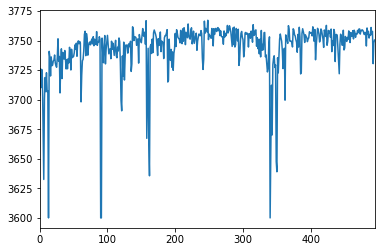

In [14]:
pd.DataFrame(dict(this=cjank['rebase_this_delta'],floor=3600)).max(1).plot()

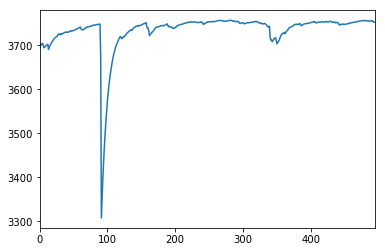

In [17]:
cjank['rebase_delta'].plot()

In [18]:
cjank

,logtime,time,this_delta,delta,gap,rebase_delta,rebase_this_delta
0,55935.675,55935.650,1.509129e+12,1.509129e+12,NaN,3696.930420,3704.035156
1,56076.510,56076.480,1.509129e+12,1.509129e+12,140.830,3699.857910,3726.205078
2,56228.560,56228.545,1.509129e+12,1.509129e+12,152.065,3700.886230,3710.140137
3,56365.155,56365.145,1.509129e+12,1.509129e+12,136.600,3703.351562,3725.540039
4,56517.125,56517.115,1.509129e+12,1.509129e+12,151.970,3704.773438,3717.570068
5,56714.920,56714.895,1.509129e+12,1.509129e+12,197.780,3701.775146,3674.790039
6,56935.175,56935.160,1.509129e+12,1.509129e+12,220.265,3694.850098,3632.525146
7,57095.115,57095.105,1.509129e+12,1.509129e+12,159.945,3695.423096,3700.580078
8,57232.975,57232.965,1.509129e+12,1.509129e+12,137.860,3697.752930,3718.719971
9,57391.970,57391.935,1.509129e+12,1.509129e+12,158.970,3698.652588,3706.750000


In [19]:
cjank.describe()

,logtime,time,this_delta,delta,gap,rebase_delta,rebase_this_delta
count,495.000000,495.000000,4.950000e+02,4.950000e+02,494.000000,495.000000,495.000000
mean,98468.997364,98468.988081,1.509129e+12,1.509129e+12,151.934494,3734.281232,3735.309101
std,21665.644382,21665.645104,1.727943e+02,4.621569e+01,445.335836,46.215692,172.794324
min,55935.675000,55935.650000,1.509129e+12,1.509129e+12,0.170000,3307.897705,0.000000
25%,85974.452500,85974.442500,1.509129e+12,1.509129e+12,115.642500,3733.323120,3740.025024
50%,101323.470000,101323.465000,1.509129e+12,1.509129e+12,117.720000,3747.695312,3749.650146
75%,116566.752500,116566.742500,1.509129e+12,1.509129e+12,130.767500,3752.727173,3755.829956
max,130991.295000,130991.290000,1.509129e+12,1.509129e+12,9252.985000,3757.218506,3767.140137


In [35]:
cjank['gap'].sort_values(ascending=False)[:10]

811     283.560
497     220.940
1400    187.660
1144    183.635
1234    161.380
374     153.785
840     123.800
372     123.055
524     118.865
188     112.645
Name: gap, dtype: float64

In [36]:
cjank.loc[cjank['gap'].isin(_)]

,start,end,elapsed,gap
188,39546.265,39549.590,3.325,112.645
372,42824.270,42833.420,9.150,123.055
374,43005.410,43013.860,8.450,153.785
497,45287.975,45290.560,2.585,220.940
524,45936.655,45946.230,9.575,118.865
811,51003.245,51010.830,7.585,283.560
840,51676.375,51679.940,3.565,123.800
1144,56986.005,56988.555,2.550,183.635
1234,58770.390,58777.525,7.135,161.380
1400,62007.655,62011.470,3.815,187.660


In [38]:
sjank = pd.DataFrame(extract(spath, r'server-jank: start (.+) end (.+) elapsed (.+)'),
                     columns=['start','end','elapsed'])

In [39]:
sjank

,start,end,elapsed
0,1.508522e+12,1.508522e+12,61.0
1,1.508522e+12,1.508522e+12,97.0
2,1.508522e+12,1.508522e+12,27.0
3,1.508522e+12,1.508522e+12,16.0
4,1.508522e+12,1.508522e+12,12.0
5,1.508522e+12,1.508522e+12,44.0
6,1.508522e+12,1.508522e+12,20.0
7,1.508522e+12,1.508522e+12,22.0
8,1.508522e+12,1.508522e+12,18.0
9,1.508522e+12,1.508522e+12,11.0


In [43]:
cbcast = pd.DataFrame(extract(cpath, r'bcast: time (.+) thisDelta (.+) delta (.+)'),
                     columns=['time','this_delta','delta'])

In [44]:
cbcast

,time,this_delta,delta
0,36311.505,1.508523e+12,1.508523e+12
1,36380.080,1.508523e+12,1.508523e+12
2,36456.190,1.508523e+12,1.508523e+12
3,36524.265,1.508523e+12,1.508523e+12
4,36590.540,1.508523e+12,1.508523e+12
5,36660.720,1.508523e+12,1.508523e+12
6,36730.965,1.508523e+12,1.508523e+12
7,36806.240,1.508523e+12,1.508523e+12
8,36872.850,1.508523e+12,1.508523e+12
9,36941.185,1.508523e+12,1.508523e+12


In [68]:
cbcast['time gap'] = [0] + cbcast['time'].diff()

In [69]:
cbcast.describe()

,time,this_delta,delta,time gap
count,404.000000,4.040000e+02,4.040000e+02,403.000000
mean,50552.657611,1.508523e+12,1.508523e+12,70.677283
std,8256.084686,2.673426e+01,9.577076e+00,24.387382
min,36311.505000,1.508523e+12,1.508523e+12,3.365000
25%,43446.375000,1.508523e+12,1.508523e+12,67.357500
50%,50542.340000,1.508523e+12,1.508523e+12,69.375000
75%,57646.060000,1.508523e+12,1.508523e+12,72.367500
max,64794.450000,1.508523e+12,1.508523e+12,268.000000


In [49]:
sbcast = pd.DataFrame(extract(spath, r'bcast: tick (.+) player (.+) snap time (.+) send done time (.+)'),
                     columns=['tick','player','snap_time','send_done_time'])

In [50]:
sbcast

,tick,player,snap_time,send_done_time
0,109.0,651.0,1.508523e+12,1.508523e+12
1,110.0,651.0,1.508523e+12,1.508523e+12
2,111.0,651.0,1.508523e+12,1.508523e+12
3,112.0,651.0,1.508523e+12,1.508523e+12
4,113.0,651.0,1.508523e+12,1.508523e+12
5,114.0,651.0,1.508523e+12,1.508523e+12
6,115.0,651.0,1.508523e+12,1.508523e+12
7,116.0,651.0,1.508523e+12,1.508523e+12
8,117.0,651.0,1.508523e+12,1.508523e+12
9,118.0,651.0,1.508523e+12,1.508523e+12


In [52]:
sbcast['snap gap'] = [0] + sbcast.snap_time.diff()

In [53]:
sbcast['tick gap'] = [0] + sbcast.tick.diff()

In [60]:
sbcast['send_time'] = sbcast['send_done_time'] - sbcast['snap_time']

In [71]:
sbcast.describe()

,tick,player,snap_time,send_done_time,snap gap,tick gap,send_time
count,1502.000000,1502.0,1.502000e+03,1.502000e+03,1501.000000,1501.0,1502.000000
mean,859.500000,651.0,1.508523e+12,1.508523e+12,71.317122,1.0,18.197736
std,433.734366,0.0,3.081982e+04,3.081958e+04,3.350129,0.0,3.072115
min,109.000000,651.0,1.508523e+12,1.508523e+12,64.000000,1.0,14.000000
25%,484.250000,651.0,1.508523e+12,1.508523e+12,69.000000,1.0,17.000000
50%,859.500000,651.0,1.508523e+12,1.508523e+12,71.000000,1.0,18.000000
75%,1234.750000,651.0,1.508523e+12,1.508523e+12,73.000000,1.0,19.000000
max,1610.000000,651.0,1.508523e+12,1.508523e+12,105.000000,1.0,52.000000
